In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Î©îÌÉÄÏ†ïÎ≥¥Í∞Ä Ïú†Ï†ÑÏûê Î∞úÌòÑÎüâÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ• SHAPÎ∂ÑÏÑù

In [ ]:
import sqlite3
import pandas as pd
db_path = "/content/drive/MyDrive/BIO_MEDICAL_PROJECT/obesity_gene_analysis/data/OBESITYGENE_PROJECT.db"

In [ ]:
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG', 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']
# gene_list_sql = ', '.join(f"'{gene}'" for gene in obesity_genes) # Î¶¨Ïä§Ìä∏Î•º SQLÏö© Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò

In [ ]:
conn = sqlite3.connect(db_path)
SHAP_metadata_df = pd.read_sql_query("""
    SELECT subject_id, treatment, sex, age_yrs, height_cm,
           base_weight_kg, base_bmi_kg_m2, base_body_fat_pct, base_pure_fat_kg
    FROM metadata
    WHERE time_point='at study start'
""", conn, index_col='subject_id')
conn.close()

In [ ]:
SHAP_metadata_df.shape

(51, 8)

In [ ]:
dummies_SHAP_metadata_df = pd.get_dummies(SHAP_metadata_df, columns=['treatment', 'sex'], drop_first=True)

In [ ]:
dummies_SHAP_metadata_df

age_yrs  height_cm  base_weight_kg  base_bmi_kg_m2  \
subject_id                                                       
1              46.0      167.0           83.38           29.90   
2              45.0      164.0           80.94           30.09   
3              52.0      178.5           99.62           31.27   
4              41.0      154.0           80.34           33.88   
5              56.0      179.0           96.67           30.17   
6              66.0      158.5           82.09           32.68   
8              48.0      165.0           78.25           28.74   
9              53.0      169.5           97.56           33.96   
10             40.0      172.0          100.01           33.81   
11             43.0      180.0           94.28           29.10   
12             51.0      165.0           85.04           31.24   
13             53.0      169.0          102.92           36.04   
14             63.0      185.5          119.63           34.77   
18             47.0      182.0           96.25           29.06   
19             67.0      155.5           86.03           35.58   
20             60.0      169.5           94.98           33.06   
21             42.0      158.5           87.40           34.79   
22             48.0      186.0          107.12           30.96   
23             66.0      178.0           99.85           31.51   
24             58.0      168.5           91.06           32.07   
25             50.0      175.5           94.24           30.60   
26             65.0      188.5          114.08           32.10   
27             42.0      169.5           81.43           28.34   
28             43.0      163.5           79.23           29.64   
29             59.0      186.0           98.66           28.52   
30             50.0      186.5          104.00           29.90   
31             50.0      164.0           90.06           33.48   
33             48.0      180.0           93.66           28.91   
34             50.0      159.0           72.87           28.82   
35             32.0      169.5           82.83           28.83   
36             53.0      170.0           79.31           27.44   
37             50.0      168.0           90.10           31.92   
38             60.0      169.5           96.72           33.66   
39             47.0      165.0           92.75           34.07   
40             56.0      158.0           83.60           33.49   
41             56.0      162.5           76.21           28.86   
42             52.0      180.5           93.56           28.72   
43             61.0      182.5          105.43           31.65   
45             53.0      165.0           85.66           31.46   
46             43.0      173.5           98.10           32.59   
47             66.0      170.0           79.63           27.55   
48             41.0      181.0          105.07           32.07   
49             39.0      177.0           99.32           31.70   
50             62.0      174.5          101.96           33.48   
51             65.0      176.0           94.28           30.44   
52             45.0      179.0           91.85           28.67   
53             34.0      184.0           94.09           27.79   
55             35.0      165.0           86.70           31.85   
56             56.0      171.0           93.36           31.93   
59             67.0      168.5           82.42           29.03   
61             52.0      182.0           94.26           28.46   

            base_body_fat_pct  base_pure_fat_kg  \
subject_id                                        
1                        39.9          33.26862   
2                        46.7          37.79898   
3                        27.2          27.09664   
4                        46.5          37.35810   
5                        32.9          31.80443   
6                        47.4          38.91066   
8                        46.2          36.15150   
9                        55.0          53.65800   
10 

In [ ]:
# y Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ Îê† Í≤É
query = f"""
SELECT
    E.subject_id,
    P.gene_symbol,
    E.exp_C_A
FROM expression_change AS E
JOIN platform AS P ON E.ID_REF = P.ID
"""

conn = sqlite3.connect(db_path)
total_genes_symbols_exp_C_A_df = pd.read_sql_query(query, conn)

In [ ]:
len(total_genes_symbols_exp_C_A_df['gene_symbol'].unique().tolist())

20255

In [ ]:
total_genes_symbols_exp_C_A_df.shape

(1764741, 3)

In [ ]:
filtered_total_genes_symbols_exp_C_A_df = total_genes_symbols_exp_C_A_df[total_genes_symbols_exp_C_A_df['gene_symbol'].notnull()]

In [ ]:
filtered_total_genes_symbols_exp_C_A_df

subject_id   gene_symbol   exp_C_A
4203             1        OR4F17 -0.224340
4204             1        SEPT14 -0.001109
4205             1        OR4F16  0.661846
4208             1          GPAM  0.036163
4210             1  LOC100287934  0.178458
...            ...           ...       ...
1764509         61          RXRB -0.092560
1764510         61         VPS52  0.069049
1764511         61          RGL2  0.117062
1764512         61         TAPBP -0.297992
1764513         61          DAXX -0.232971

[1173844 rows x 3 columns]

In [ ]:
total_genes_symbols_exp_C_A_df

subject_id gene_symbol   exp_C_A
0                1        None -0.402629
1                1        None  1.251101
2                1        None -1.115590
3                1        None  0.849925
4                1        None -1.044279
...            ...         ...       ...
1764736         61        None -0.522933
1764737         61        None -0.023247
1764738         61        None  0.040307
1764739         61        None -0.013860
1764740         61        None -0.794944

[1764741 rows x 3 columns]

In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df = filtered_total_genes_symbols_exp_C_A_df.pivot_table(
    index='subject_id',
    columns='gene_symbol',
    values='exp_C_A')

In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df

gene_symbol      A1BG      A1CF     A2LD1       A2M     A2ML1    A4GALT  \
subject_id                                                                
1           -0.203501 -0.257881 -0.076882 -0.070258 -0.053789  0.359254   
10          -0.289141  0.304956 -0.136773 -0.200091 -0.079607 -0.082132   
11          -0.018572  0.201289  0.048916  0.176325  0.179518  0.082603   
12          -0.364803 -0.186572  0.010086  0.158080 -0.691446  0.133029   
13           0.068879 -0.071343 -0.361604  0.083380 -0.186179 -0.366747   
14           0.281799 -0.355884 -0.035775 -0.153475  0.017159 -0.201125   
18          -0.648461 -0.394088  0.078309  0.289820 -0.649276 -0.237888   
19           0.743935 -0.111559  0.508087  0.021051 -0.666260  0.054175   
2           -0.063825 -0.235455  0.045844  0.073061  0.365945  0.051688   
20          -0.041475  0.119167  0.037788 -0.236331  0.110442  0.153314   
21          -0.385656  0.246014 -0.270760  0.689651  0.532180  0.284714   
22          -0.546683 -0.168519 -0.223456 -0.102127  0.118586  0.073803   
23           0.167958 -0.102734  0.081314  0.262500  0.327816 -0.785098   
24           0.179101 -0.425865 -0.107785  0.089624 -0.205486  0.486858   
25           0.161191 -0.013079  0.469745 -0.095869 -0.306044  0.571165   
26           0.036480  0.135456 -0.573984 -0.026925 -0.225288 -0.504048   
27          -0.139061 -0.042662 -0.014354 -0.084480  0.536130  0.284644   
28           0.315819 -0.158429 -0.078336 -0.054201  0.344437  0.601913   
29           0.050717  0.357854  0.123470 -0.241393 -0.228287  0.464039   
3            0.331567  0.481366 -0.087400 -0.191296  0.716937  0.291029   
30           0.605938  0.278337 -0.031669 -0.191211  0.545145 -0.279712   
31          -0.464057  0.031067 -0.323463  0.183248 -0.381362 -0.145477   
33          -0.190822  0.077167  0.172913  0.078740  0.148373 -0.085215   
34          -0.107161  0.081620 -0.489972 -0.084293 -0.039793 -0.248916   
35          -0.327663  0.355376  0.031864 -0.240037  0.134378 -0.492706   
36           0.183351 -0.197123 -0.104680  0.069976  0.319562  0.055669   
37           0.164749 -0.012314 -0.373764 -0.062830  0.037861  0.091012   
38           0.172658 -0.144600 -0.125222 -0.077274 -0.241196 -0.050168   
39           0.370370 -0.317175  0.102491  0.107451  0.529223  0.084040   
4           -0.453093 -0.458739  0.060980  0.058907 -0.539963 -0.317243   
40           0.343603 -0.288380  0.143749  0.029891 -0.018584 -0.091466   
41          -0.256905 -0.114550  0.345148 -0.126260 -0.031343 -0.015983   
42          -0.305340 -0.171856 -0.168664 -0.083117 -0.515729 -0.257572   
43          -0.480712  0.101985 -0.299918  0.285642  0.056669  0.416203   
45          -0.263985 -0.082751 -0.013375 -0.056438 -0.090453  0.150538   
46          -0.322851 -0.032918  0.270004 -0.168836 -0.187888  0.050203   
47           0.469837  0.029995  0.229983 -0.367081  0.507152  0.228478   
48           0.267626  0.121131 -0.073474  0.237160 -0.051359 -0.239008   
49           0.498557  0.036487  0.097161 -0.284215  0.410206  0.070663   
5            0.190182 -0.452685  0.091211  0.700626 -0.534776  0.258368   
50           0.048701 -0.134482  0.389061  0.274080 -0.092658 -0.047649   
51          -0.131116 -0.199558 -0.188601 -0.219563  0.049572  0.520025   
52           0.317467 -0.019005 -0.393198 -0.004142  0.022959  0.228117   
55          -0.183894 -0.451310 -0.036607  0.199358 -0.463824  0.342220   
56           0.034264  0.360186  0.151568 -0.047804  0.294664 -0.231755   
6           -0.167041  0.223626 -0.305258  0.177587  0.381462 -0.221862   
61           0.480896 -0.112621 -0.323959 -0.077478  0.413672 -0.202714   
8           -0.063402  0.201305 -0.067751  0.178803  0.478794 -0.082730   
9            0.320022  0.122439 -0.041272 -0.016082 -0.025440  0.068483   

gene_symbol     A4GNT      AAA1      AAAS      AACS  ...      ZXDA      ZXDB  \
subject_id                                           ...                       
1           -0

In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df[obesity_genes].shape

(49, 12)

In [ ]:
X=dummies_SHAP_metadata_df
y=pivot_filtered_total_genes_symbols_exp_C_A_df[obesity_genes]

In [ ]:
print(X.shape)
print(y.shape)

(51, 8)
(49, 12)


In [57]:
# Í≥µÌÜµ Ïù∏Îç±Ïä§ (subject_id) Ï∂îÏ∂ú
common_index = X.index.intersection(y.index)

# Í≥µÌÜµ Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú X, y Ï†ïÎ†¨ Î∞è ÌïÑÌÑ∞ÎßÅ
X_common = X.loc[common_index]
y_common = y.loc[common_index]

In [58]:
print(X_common.shape)
print(y_common.shape)
print(X_common.index.equals(y_common.index))  # TrueÏó¨Ïïº ÏïàÏ†Ñ

(49, 8)
(49, 12)
True


In [59]:
X_common

age_yrs  height_cm  base_weight_kg  base_bmi_kg_m2  \
subject_id                                                       
1              46.0      167.0           83.38           29.90   
2              45.0      164.0           80.94           30.09   
3              52.0      178.5           99.62           31.27   
4              41.0      154.0           80.34           33.88   
5              56.0      179.0           96.67           30.17   
6              66.0      158.5           82.09           32.68   
8              48.0      165.0           78.25           28.74   
9              53.0      169.5           97.56           33.96   
10             40.0      172.0          100.01           33.81   
11             43.0      180.0           94.28           29.10   
12             51.0      165.0           85.04           31.24   
13             53.0      169.0          102.92           36.04   
14             63.0      185.5          119.63           34.77   
18             47.0      182.0           96.25           29.06   
19             67.0      155.5           86.03           35.58   
20             60.0      169.5           94.98           33.06   
21             42.0      158.5           87.40           34.79   
22             48.0      186.0          107.12           30.96   
23             66.0      178.0           99.85           31.51   
24             58.0      168.5           91.06           32.07   
25             50.0      175.5           94.24           30.60   
26             65.0      188.5          114.08           32.10   
27             42.0      169.5           81.43           28.34   
28             43.0      163.5           79.23           29.64   
29             59.0      186.0           98.66           28.52   
30             50.0      186.5          104.00           29.90   
31             50.0      164.0           90.06           33.48   
33             48.0      180.0           93.66           28.91   
34             50.0      159.0           72.87           28.82   
35             32.0      169.5           82.83           28.83   
36             53.0      170.0           79.31           27.44   
37             50.0      168.0           90.10           31.92   
38             60.0      169.5           96.72           33.66   
39             47.0      165.0           92.75           34.07   
40             56.0      158.0           83.60           33.49   
41             56.0      162.5           76.21           28.86   
42             52.0      180.5           93.56           28.72   
43             61.0      182.5          105.43           31.65   
45             53.0      165.0           85.66           31.46   
46             43.0      173.5           98.10           32.59   
47             66.0      170.0           79.63           27.55   
48             41.0      181.0          105.07           32.07   
49             39.0      177.0           99.32           31.70   
50             62.0      174.5          101.96           33.48   
51             65.0      176.0           94.28           30.44   
52             45.0      179.0           91.85           28.67   
55             35.0      165.0           86.70           31.85   
56             56.0      171.0           93.36           31.93   
61             52.0      182.0           94.26           28.46   

            base_body_fat_pct  base_pure_fat_kg  \
subject_id                                        
1                        39.9          33.26862   
2                        46.7          37.79898   
3                        27.2          27.09664   
4                        46.5          37.35810   
5                        32.9          31.80443   
6                        47.4          38.91066   
8                        46.2          36.15150   
9                        55.0          53.65800   
10                       45.3          45.30453   
11                       30.3          28.56684   
12                       49.4    

In [60]:
y_common

gene_symbol       FTO      MC4R       LEP      LEPR    ADIPOQ     PPARG  \
subject_id                                                                
1           -0.013301 -0.190319 -0.465870 -0.024795 -0.196041  0.229769   
2           -0.356816  0.708908 -0.979490 -0.217327 -0.518054 -0.143799   
3           -0.346506  0.561015 -0.856264 -0.171752 -0.175765 -0.265013   
4            0.199921  0.149483  0.363810  0.097061  0.076487  0.569511   
5            0.835166 -0.343142  0.799537  0.690802  1.300431  0.848258   
6           -0.225121  0.466712 -0.476599 -0.305968 -0.049754 -0.039589   
8            0.033455 -0.239153 -0.530509  0.041845  0.258315  0.296417   
9           -0.189385  0.002838 -0.408701 -0.236623 -0.117022 -0.086714   
10           0.041325  0.193810 -0.338549  0.074902  0.115678  0.044412   
11          -0.030540 -0.220394 -0.477162  0.081710 -0.004271  0.214201   
12           0.121298 -0.977750 -0.115722  0.452690  0.274725  0.330165   
13           0.356442 -0.707449 -0.292345  0.354884  0.381785  0.249043   
14          -0.081788  0.172764 -0.346569 -0.210482 -0.224576 -0.007982   
18           0.122677 -0.248531 -0.229164  0.405684  0.267665  0.394284   
19           0.176622 -0.084552 -0.031183 -0.017908  0.177774  0.235191   
20          -0.173498  0.362516 -0.837343 -0.301594 -0.246423 -0.138474   
21           0.130392  0.459919 -0.069449  0.187249  0.675289  0.300133   
22           0.278440 -0.092864 -0.406941  0.144761 -0.055102  0.258738   
23           0.273306 -0.530811  0.106646  0.117624  0.718589  0.588460   
24          -0.239625 -0.400058 -0.751408 -0.137368  0.034511 -0.002528   
25          -0.105405 -0.067876 -0.293568  0.382373 -0.113871 -0.049880   
26          -0.162053  0.214223 -0.693865  0.153336  0.092030 -0.000102   
27          -0.106287  0.377229 -0.614890 -0.059719 -0.169680 -0.089179   
28          -0.268319 -0.109556 -0.423308  0.069892 -0.164132 -0.238539   
29           0.103171 -0.332635 -0.342792 -0.095258  0.225819  0.093823   
30          -0.192039 -0.805311 -0.706295 -0.060711 -0.304040  0.071046   
31          -0.252485  0.039358 -0.526457  0.056751 -0.119829  0.052861   
33           0.376346  0.117773  0.713343  0.511323  0.238169  0.587793   
34          -0.069844  0.193960 -0.609728  0.107450 -0.187742 -0.164333   
35          -0.267340 -0.096947 -0.252802 -0.120998 -0.072039  0.038792   
36          -0.228211  0.584844 -0.840043  0.036690 -0.110008 -0.089884   
37          -0.062133 -0.700997 -0.314468  0.051909 -0.085973 -0.007191   
38          -0.023815 -0.661680 -0.946836  0.304409  0.088830  0.052338   
39          -0.162058 -0.065330 -0.257475  0.191496  0.041035 -0.524440   
40           0.013704 -0.191936 -0.430908  0.195762 -0.203140 -0.120960   
41           0.030204  0.189079 -0.919521 -0.090866  0.110760  0.036412   
42           0.073315  0.113212 -0.563828  0.003301  0.273440  0.110558   
43           0.003875 -0.315851 -1.660715 -0.181667 -0.137499  0.224692   
45          -0.075218 -0.396995 -0.657420  0.025052 -0.077212  0.015980   
46          -0.023963 -0.185417 -0.894632  0.246825 -0.132228 -0.104141   
47          -0.003753 -0.439173 -0.691701 -0.252273 -0.185659 -0.030286   
48           0.194707  0.187006 -0.709940  0.066630  0.007903 -0.038143   
49          -0.417525  0.649030 -1.199631 -0.658657 -0.243024 -0.107561   
50           0.043794  0.000006 -0.118219 -0.064979  0.085352  0.162758   
51           0.070089  0.298276 -0.831378 -0.154059 -0.211989 -0.171042   
52          -0.357452  0.373280 -0.077448 -0.539576 -0.078117 -0.035176   
55          -0.183659  0.261473 -0.509459  0.471152 -0.115100 -0.112659   
56          -0.094094  0.403948  0.681304 -0.002767  0.092120  0.055129   
61           0.165903  0.280778  0.380700 -0.047348 -0.082024  0.221693   

gene_symbol      UCP1      UCP2      BDNF    GNPDA2    TMEM18     NEGR1  
subject_id                                                               
1            0.124143 -0.2

In [61]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model.fit(X_common, y_common)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [85]:
import shap
import pandas as pd
import numpy as np
from tqdm import tqdm

gene_shap_dict = {}

# Ïú†Ï†ÑÏûêÎ≥ÑÎ°ú SHAP Í≥ÑÏÇ∞ (Ï¥ù 12Í∞ú Î™®Îç∏)
for i, gene_name in tqdm(enumerate(obesity_genes), total=len(obesity_genes)):
    # iÎ≤àÏß∏ Ïú†Ï†ÑÏûê Î™®Îç∏ Ï∂îÏ∂ú
    single_model = model.estimators_[i]

    # SHAP explainer
    explainer = shap.TreeExplainer(single_model)
    shap_values = explainer.shap_values(X_common)  # (n_samples, n_features)

    # ÌèâÍ∑† Ï†àÎåìÍ∞í SHAP
    mean_abs_shap = np.abs(shap_values).mean(axis=0)  # (n_features,)

    # Ï†ÄÏû•
    gene_shap_dict[gene_name] = mean_abs_shap

gene_feature_shap_df = pd.DataFrame(gene_shap_dict, index=X_common.columns).T

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:01<00:00, 11.09it/s]


In [86]:
gene_feature_shap_df

age_yrs  height_cm  base_weight_kg  base_bmi_kg_m2  \
FTO     0.024396   0.048932        0.017705        0.016789   
MC4R    0.037202   0.033938        0.036039        0.055241   
LEP     0.031045   0.078640        0.085955        0.034957   
LEPR    0.051040   0.012464        0.023536        0.027651   
ADIPOQ  0.033637   0.037371        0.019003        0.044091   
PPARG   0.016848   0.089543        0.014671        0.021016   
UCP1    0.009670   0.025713        0.029739        0.040218   
UCP2    0.043731   0.044861        0.061267        0.028620   
BDNF    0.038756   0.010162        0.012881        0.065233   
GNPDA2  0.042853   0.031811        0.040379        0.036711   
TMEM18  0.022722   0.027299        0.018913        0.016817   
NEGR1   0.032816   0.070255        0.047562        0.022730   

        base_body_fat_pct  base_pure_fat_kg  treatment_very-low-calorie diet  \
FTO              0.021205          0.017877                         0.007330   
MC4R             0.105616          0.060623                         0.031636   
LEP              0.036943          0.043854                         0.006563   
LEPR             0.017845          0.023835                         0.025372   
ADIPOQ           0.030054          0.021423                         0.004609   
PPARG            0.021160          0.018160                         0.002605   
UCP1             0.027195          0.032189                         0.002333   
UCP2             0.044469          0.051380                         0.003543   
BDNF             0.022198          0.052491                         0.004013   
GNPDA2           0.032662          0.060492                         0.039188   
TMEM18           0.029323          0.033339                         0.013977   
NEGR1            0.026074          0.032692                         0.005665   

        sex_male  
FTO     0.000506  
MC4R    0.001367  
LEP     0.025611  
LEPR    0.000836  
ADIPOQ  0.002787  
PPARG   0.003103  
UCP1    0.001484  
UCP2    0.009615  
BDNF    0.000843  
GNPDA2  0.001180  
TMEM18  0.000717  
NEGR1   0.013246

In [87]:
gene_feature_shap_df.shape

(12, 8)

### Feature Ï§ëÏöîÎèÑ vs Ìé∏Ï∞® ÏãúÍ∞ÅÌôî ÏΩîÎìú

In [88]:
import matplotlib.pyplot as plt

# ÌèâÍ∑† Ï§ëÏöîÎèÑÏôÄ ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
mean_importance = gene_feature_shap_df.mean(axis=0)
std_importance = gene_feature_shap_df.std(axis=0)

# Ï§ëÏöîÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
sorted_features = mean_importance.sort_values(ascending=False).index
mean_sorted = mean_importance[sorted_features]
std_sorted = std_importance[sorted_features]

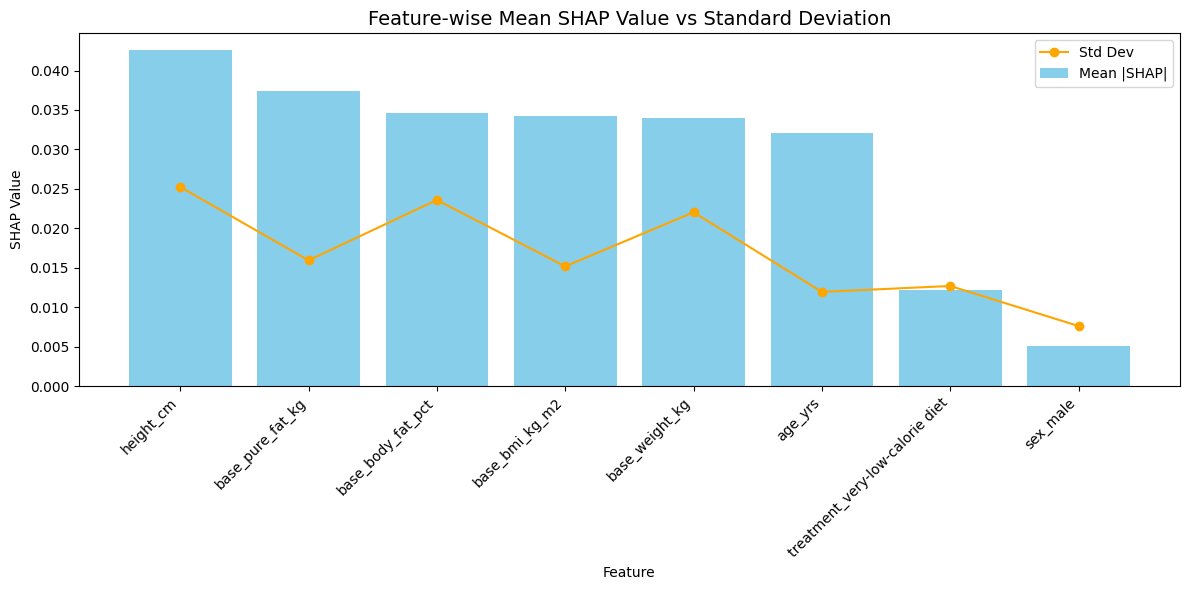

In [89]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Bar: ÌèâÍ∑† Ï§ëÏöîÎèÑ
ax.bar(sorted_features, mean_sorted, color='skyblue', label='Mean |SHAP|')

# Line: ÌëúÏ§ÄÌé∏Ï∞®
ax.plot(sorted_features, std_sorted, color='orange', marker='o', label='Std Dev')

plt.title("Feature-wise Mean SHAP Value vs Standard Deviation", fontsize=14)
plt.ylabel("SHAP Value")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### z-score

axis=0Ïù¥ÎÉê axis=1Ïù¥ÎÉêÏóê Îî∞Îùº

In [90]:
gene_feature_shap_df

age_yrs  height_cm  base_weight_kg  base_bmi_kg_m2  \
FTO     0.024396   0.048932        0.017705        0.016789   
MC4R    0.037202   0.033938        0.036039        0.055241   
LEP     0.031045   0.078640        0.085955        0.034957   
LEPR    0.051040   0.012464        0.023536        0.027651   
ADIPOQ  0.033637   0.037371        0.019003        0.044091   
PPARG   0.016848   0.089543        0.014671        0.021016   
UCP1    0.009670   0.025713        0.029739        0.040218   
UCP2    0.043731   0.044861        0.061267        0.028620   
BDNF    0.038756   0.010162        0.012881        0.065233   
GNPDA2  0.042853   0.031811        0.040379        0.036711   
TMEM18  0.022722   0.027299        0.018913        0.016817   
NEGR1   0.032816   0.070255        0.047562        0.022730   

        base_body_fat_pct  base_pure_fat_kg  treatment_very-low-calorie diet  \
FTO              0.021205          0.017877                         0.007330   
MC4R             0.105616          0.060623                         0.031636   
LEP              0.036943          0.043854                         0.006563   
LEPR             0.017845          0.023835                         0.025372   
ADIPOQ           0.030054          0.021423                         0.004609   
PPARG            0.021160          0.018160                         0.002605   
UCP1             0.027195          0.032189                         0.002333   
UCP2             0.044469          0.051380                         0.003543   
BDNF             0.022198          0.052491                         0.004013   
GNPDA2           0.032662          0.060492                         0.039188   
TMEM18           0.029323          0.033339                         0.013977   
NEGR1            0.026074          0.032692                         0.005665   

        sex_male  
FTO     0.000506  
MC4R    0.001367  
LEP     0.025611  
LEPR    0.000836  
ADIPOQ  0.002787  
PPARG   0.003103  
UCP1    0.001484  
UCP2    0.009615  
BDNF    0.000843  
GNPDA2  0.001180  
TMEM18  0.000717  
NEGR1   0.013246

In [91]:
from scipy.stats import zscore

# z-score Í≥ÑÏÇ∞
z_array_1 = zscore(gene_feature_shap_df, axis=1)
z_array_0 = zscore(gene_feature_shap_df, axis=0)

# numpy.ndarray-> DataFrameÏúºÎ°ú Îã§Ïãú Î≥ÄÌôò
gene_shap_zscore_df_1 = pd.DataFrame(z_array_1, index=gene_feature_shap_df.index, columns=gene_feature_shap_df.columns)
gene_shap_zscore_df_0 = pd.DataFrame(z_array_0, index=gene_feature_shap_df.index, columns=gene_feature_shap_df.columns)

In [92]:
# Ïú†Ï†ÑÏûêÎ≥ÑÎ°ú Í∞ÄÏû• ÎØºÍ∞êÌïú Feature Top-3
topk_gene_to_feature = {}

for gene in gene_shap_zscore_df_1.index:
    top_features = gene_shap_zscore_df_1.loc[gene].sort_values(ascending=False)
    topk_gene_to_feature[gene] = top_features  # Ï†ÑÏ≤¥ Ï†ÄÏû•

# Í≤∞Í≥º ÌôïÏù∏ Ïãú Top-3Îßå Ï∂úÎ†•
print("üß¨ Ïú†Ï†ÑÏûêÎ≥Ñ Top-3 ÎØºÍ∞ê Feature:")
for gene, feats in topk_gene_to_feature.items():
    top3 = feats.head(3)  # Ï∂úÎ†• ÏãúÏóêÎßå ÏûêÎ•¥Í∏∞
    print(f"{gene}: {list(top3.index)} (z: {top3.values.round(2)})")

üß¨ Ïú†Ï†ÑÏûêÎ≥Ñ Top-3 ÎØºÍ∞ê Feature:
FTO: ['height_cm', 'age_yrs', 'base_body_fat_pct'] (z: [2.22 0.38 0.14])
MC4R: ['base_body_fat_pct', 'base_pure_fat_kg', 'base_bmi_kg_m2'] (z: [2.14 0.55 0.36])
LEP: ['base_weight_kg', 'height_cm', 'base_pure_fat_kg'] (z: [1.72 1.43 0.04])
LEPR: ['age_yrs', 'base_bmi_kg_m2', 'treatment_very-low-calorie diet'] (z: [2.1  0.36 0.19])
ADIPOQ: ['base_bmi_kg_m2', 'height_cm', 'age_yrs'] (z: [1.43 0.95 0.68])
PPARG: ['height_cm', 'base_body_fat_pct', 'base_bmi_kg_m2'] (z: [ 2.55 -0.09 -0.09])
UCP1: ['base_bmi_kg_m2', 'base_pure_fat_kg', 'base_weight_kg'] (z: [1.4  0.82 0.64])
UCP2: ['base_weight_kg', 'base_pure_fat_kg', 'height_cm'] (z: [1.33 0.81 0.47])
BDNF: ['base_bmi_kg_m2', 'base_pure_fat_kg', 'age_yrs'] (z: [1.77 1.2  0.58])
GNPDA2: ['base_pure_fat_kg', 'age_yrs', 'base_weight_kg'] (z: [1.6  0.46 0.3 ])
TMEM18: ['base_pure_fat_kg', 'base_body_fat_pct', 'height_cm'] (z: [1.34 0.93 0.72])
NEGR1: ['height_cm', 'base_weight_kg', 'age_yrs'] (z: [2.05 0

In [93]:
topk_gene_to_feature

{'FTO': height_cm                          2.224848
 age_yrs                            0.380015
 base_body_fat_pct                  0.140056
 base_pure_fat_kg                  -0.110209
 base_weight_kg                    -0.123128
 base_bmi_kg_m2                    -0.192002
 treatment_very-low-calorie diet   -0.903249
 sex_male                          -1.416332
 Name: FTO, dtype: float64,
 'MC4R': base_body_fat_pct                  2.140968
 base_pure_fat_kg                   0.546344
 base_bmi_kg_m2                     0.355605
 age_yrs                           -0.283738
 base_weight_kg                    -0.324946
 height_cm                         -0.399414
 treatment_very-low-calorie diet   -0.481017
 sex_male                          -1.553803
 Name: MC4R, dtype: float64,
 'LEP': base_weight_kg                     1.722012
 height_cm                          1.429141
 base_pure_fat_kg                   0.036363
 base_body_fat_pct                 -0.240363
 base_bmi_kg_m2      

In [94]:
# FeatureÎ≥ÑÎ°ú Ï†ÑÏ≤¥ ÎØºÍ∞ê Ïú†Ï†ÑÏûê Ï†ÄÏû•
topk_feature_to_gene = {}

for feature in gene_shap_zscore_df_0.columns:
    top_genes = gene_shap_zscore_df_0[feature].sort_values(ascending=False)
    topk_feature_to_gene[feature] = top_genes  # Ï†ÑÏ≤¥ Ï†ÄÏû•

# Í≤∞Í≥º ÌôïÏù∏ Ïãú Top-3Îßå Ï∂úÎ†•
print("\nüìä FeatureÎ≥Ñ Top-3 ÎØºÍ∞ê Ïú†Ï†ÑÏûê:")
for feat, genes in topk_feature_to_gene.items():
    top3 = genes.head(3)
    print(f"{feat}: {list(top3.index)} (z: {top3.values.round(2)})")


üìä FeatureÎ≥Ñ Top-3 ÎØºÍ∞ê Ïú†Ï†ÑÏûê:
age_yrs: ['LEPR', 'UCP2', 'GNPDA2'] (z: [1.66 1.02 0.94])
height_cm: ['PPARG', 'LEP', 'NEGR1'] (z: [1.94 1.49 1.14])
base_weight_kg: ['LEP', 'UCP2', 'NEGR1'] (z: [2.46 1.29 0.64])
base_bmi_kg_m2: ['BDNF', 'MC4R', 'ADIPOQ'] (z: [2.14 1.45 0.68])
base_body_fat_pct: ['MC4R', 'UCP2', 'LEP'] (z: [3.15 0.44 0.11])
base_pure_fat_kg: ['MC4R', 'GNPDA2', 'BDNF'] (z: [1.52 1.52 0.99])
treatment_very-low-calorie diet: ['GNPDA2', 'MC4R', 'LEPR'] (z: [2.22 1.6  1.08])
sex_male: ['LEP', 'NEGR1', 'UCP2'] (z: [2.82 1.12 0.62])


In [95]:
topk_feature_to_gene

{'age_yrs': LEPR      1.660955
 UCP2      1.021379
 GNPDA2    0.944536
 BDNF      0.586043
 MC4R      0.450003
 ADIPOQ    0.137992
 NEGR1     0.066204
 LEP      -0.088778
 FTO      -0.670628
 TMEM18   -0.817182
 PPARG    -1.331171
 UCP1     -1.959354
 Name: age_yrs, dtype: float64,
 'height_cm': PPARG     1.942841
 LEP       1.491751
 NEGR1     1.144838
 FTO       0.262675
 UCP2      0.094283
 ADIPOQ   -0.215587
 MC4R     -0.357629
 GNPDA2   -0.445643
 TMEM18   -0.632297
 UCP1     -0.697908
 LEPR     -1.246027
 BDNF     -1.341296
 Name: height_cm, dtype: float64,
 'base_weight_kg': LEP       2.464996
 UCP2      1.294340
 NEGR1     0.644478
 GNPDA2    0.303861
 MC4R      0.098080
 UCP1     -0.200672
 LEPR     -0.494815
 ADIPOQ   -0.709733
 TMEM18   -0.714033
 FTO      -0.771308
 PPARG    -0.915164
 BDNF     -1.000030
 Name: base_weight_kg, dtype: float64,
 'base_bmi_kg_m2': BDNF      2.138531
 MC4R      1.450577
 ADIPOQ    0.682856
 UCP1      0.416217
 GNPDA2    0.174746
 LEP       0.05

'Ïú†Ï†ÑÏûêÎ≥Ñ Top-3 ÎØºÍ∞ê Feature'ÏôÄ 'FeatureÎ≥Ñ Top-3 ÎØºÍ∞ê Ïú†Ï†ÑÏûê'Í∞Ä ÏÑúÎ°ú Ï§ëÎ≥µÎêòÎäî Í≤ÉÏù¥ ÏûàÎäîÏßÄ ÏùòÎ¨∏Ïù¥ ÏÉùÍ≤® ÏïÑÎûò Í∑∏Î£π Î∂ÑÎ•òÎ•º ÏßÑÌñâÌïòÏòÄÏùå

In [96]:
import pandas as pd

# topk_gene_to_feature Í∏∞Î∞ò gene_data ÎßåÎì§Í∏∞
gene_rows = []
for gene, series in topk_gene_to_feature.items():
    for feat, z in series.items():
        gene_rows.append({'Gene': gene, 'Feature': feat.strip(), 'Z_gene': z})
gene_df = pd.DataFrame(gene_rows)

# 2. feature_data ÎßåÎì§Í∏∞ (feature ‚Üí gene Í∏∞Ï§Ä)
feat_rows = []
# FeatureÎ≥ÑÎ°ú Ïú†Ï†ÑÏûê Í∑∏Î£πÌïë
for feat in gene_df['Feature'].unique():
    temp = gene_df[gene_df['Feature'] == feat].sort_values('Z_gene', ascending=False)
    for _, row in temp.iterrows():
        feat_rows.append({'Gene': row['Gene'], 'Feature': feat, 'Z_feat': row['Z_gene']})
feat_df = pd.DataFrame(feat_rows)

In [97]:
# 3. FeatureÎ≥Ñ ÏÉÅÏúÑ 3Í∞úÎßå Ïú†ÏßÄ
feat_df = feat_df.sort_values(['Feature', 'Z_feat'], ascending=[True, False])
feat_df = feat_df.groupby('Feature').head(3)

# 4. GeneÎ≥Ñ ÏÉÅÏúÑ 3Í∞úÎßå Ïú†ÏßÄ
gene_df = gene_df.sort_values(['Gene', 'Z_gene'], ascending=[True, False])
gene_df = gene_df.groupby('Gene').head(3)

# 5. Î≥ëÌï©
merged_df = pd.merge(gene_df, feat_df, on=['Gene', 'Feature'], how='outer')

In [98]:
# 6. Í∑∏Î£π Î∂ÑÎ•ò (Ïà´Ïûê Í∏∞Î∞ò)
def classify_relation(row):
    g, f = row['Z_gene'], row['Z_feat']
    g_valid = pd.notna(g) and g >= 1.48
    f_valid = pd.notna(f) and f >= 1.48
    if g_valid and f_valid:
        return 0  # ÍµêÏßëÌï©
    elif g_valid:
        return 1  # Ïú†Ï†ÑÏûê Í∏∞Ï§ÄÎßå
    elif f_valid:
        return 2  # Feature Í∏∞Ï§ÄÎßå
    else:
        return None

merged_df['Group'] = merged_df.apply(classify_relation, axis=1)
final_df = merged_df[merged_df['Group'].notnull()].sort_values('Group')

In [99]:
final_df.shape

(8, 5)

In [100]:
final_df

Gene            Feature    Z_gene    Z_feat  Group
4     BDNF     base_bmi_kg_m2  1.772015  1.772015    0.0
8      FTO          height_cm  2.224848  2.224848    0.0
10  GNPDA2   base_pure_fat_kg  1.604242  1.604242    0.0
14     LEP     base_weight_kg  1.722012  1.722012    0.0
17    LEPR            age_yrs  2.100970  2.100970    0.0
21    MC4R  base_body_fat_pct  2.140968  2.140968    0.0
26   NEGR1          height_cm  2.052449  2.052449    0.0
30   PPARG          height_cm  2.551835  2.551835    0.0

| Z-score  | ÎàÑÏ†Å ÎπÑÏú®(%) | ÏùòÎØ∏                            |
| -------- | -------- | ----------------------------- |
| 1.0      | 84.1%    | ÏÉÅÏúÑ 15.9% Ïù¥ÏÉÅ                   |
| 1.28     | 90%      | ÏÉÅÏúÑ 10% Ïù¥ÏÉÅ                     |
| **1.48** | **93%**  | ÏÉÅÏúÑ ÏïΩ **7% Ïù¥ÏÉÅ**                |
| 1.64     | 95%      | ÏÉÅÏúÑ 5% Ïù¥ÏÉÅ                      |
| 1.96     | 97.5%    | ÏÉÅÏúÑ 2.5% Ïù¥ÏÉÅ (95% Ïã†Î¢∞Íµ¨Í∞Ñ Í∏∞Ï§Ä ÏñëÏ™Ω Ìï©) |


### **2. Ïú†Ï†ÑÏûê Í∏∞Ï§ÄÎßå ÎØºÍ∞ê (Z_gene ‚â• 1.48 & Z_feat < 1.48 or NaN)**

**ÏùòÎØ∏:**
Ïú†Ï†ÑÏûê Î™®Îç∏ Í∏∞Ï§ÄÏúºÎ°ú Ìï¥Îãπ FeatureÍ∞Ä Ìï¥Îãπ Ïú†Ï†ÑÏûê Î∞úÌòÑÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§å.

ÌïòÏßÄÎßå, Ï†ÑÏ≤¥ Feature Í∏∞Ï§ÄÏóêÏÑúÎäî Ïù¥ Ïú†Ï†ÑÏûêÍ∞Ä Í∞ÄÏû• ÎØºÍ∞êÌïú ÎåÄÏÉÅÏùÄ ÏïÑÎãò.


**Ìï¥ÏÑù ÌåÅ:**
Ïù¥ FeatureÎäî ÌäπÏ†ï Ïú†Ï†ÑÏûêÏóê Íµ≠ÏÜåÏ†ÅÏúºÎ°úÎßå Ï§ëÏöîÌïú ÏòÅÌñ•Î†•ÏùÑ ÎØ∏Ïπ®.

Ïã§ÌóòÏ†Å Ï°∞Ï†àÏù¥ Í∞ÄÎä•Ìïú FeatureÎùºÎ©¥ ÌÉÄÍ≤ü Ïú†Ï†ÑÏûê Ï°∞Ï†àÏö© ÌõÑÎ≥¥Î°ú Î≥º Ïàò ÏûàÏùå.



### **3. Feature Í∏∞Ï§ÄÎßå ÎØºÍ∞ê (Z_gene < 1.48 or NaN & Z_feat ‚â• 1.48)**

**ÏùòÎØ∏:**
Ïù¥ FeatureÎäî Ïó¨Îü¨ Ïú†Ï†ÑÏûê Ï§ë Ïù¥ ÌäπÏ†ï Ïú†Ï†ÑÏûêÏóê Í∞ÄÏû• ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌï®.

ÌïòÏßÄÎßå, Ìï¥Îãπ Ïú†Ï†ÑÏûêÏùò ÏûÖÏû•ÏóêÏÑúÎäî Ïù¥ FeatureÍ∞Ä Íº≠ Ï§ëÏöîÌïú ÏöîÏù∏ÏùÄ ÏïÑÎãò.

**Ìï¥ÏÑù ÌåÅ:**
Ïù¥ FeatureÎ•º ÌÜµÌï¥ Ìï¥Îãπ Ïú†Ï†ÑÏûêÎ•º Ï∂îÏ†ÅÌïòÍ±∞ÎÇò ÌäπÏßïÏßÄÏùÑ Ïàò ÏûàÏùå.

ÏßÑÎã®Ïö© Î∞îÏù¥Ïò§ÎßàÏª§ ÌõÑÎ≥¥Î°ú Ìï¥ÏÑù Í∞ÄÎä•ÏÑ± ÏûàÏùå (Feature ‚Üí Gene)


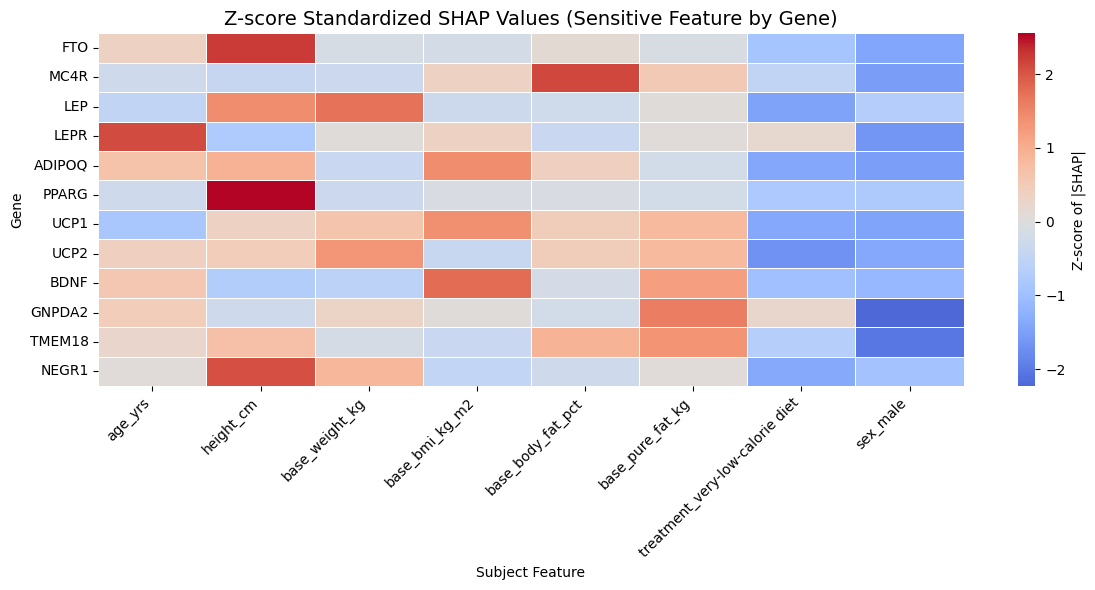

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(gene_shap_zscore_df_1, cmap='coolwarm', center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Z-score of |SHAP|'})

# Í∞Å Ïú†Ï†ÑÏûê(Gene) ÎßàÎã§, Ïñ¥Îñ§ FeatureÍ∞Ä Ìï¥Îãπ Ïú†Ï†ÑÏûêÏóê ÏñºÎßàÎÇò ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÎäîÏßÄÎ•º ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌåêÎã®ÌïòÎäî Í∏∞Ï§ÄÏûÑ.
plt.title("Z-score Standardized SHAP Values (Sensitive Feature by Gene)", fontsize=14)
plt.xlabel("Subject Feature")
plt.ylabel("Gene")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

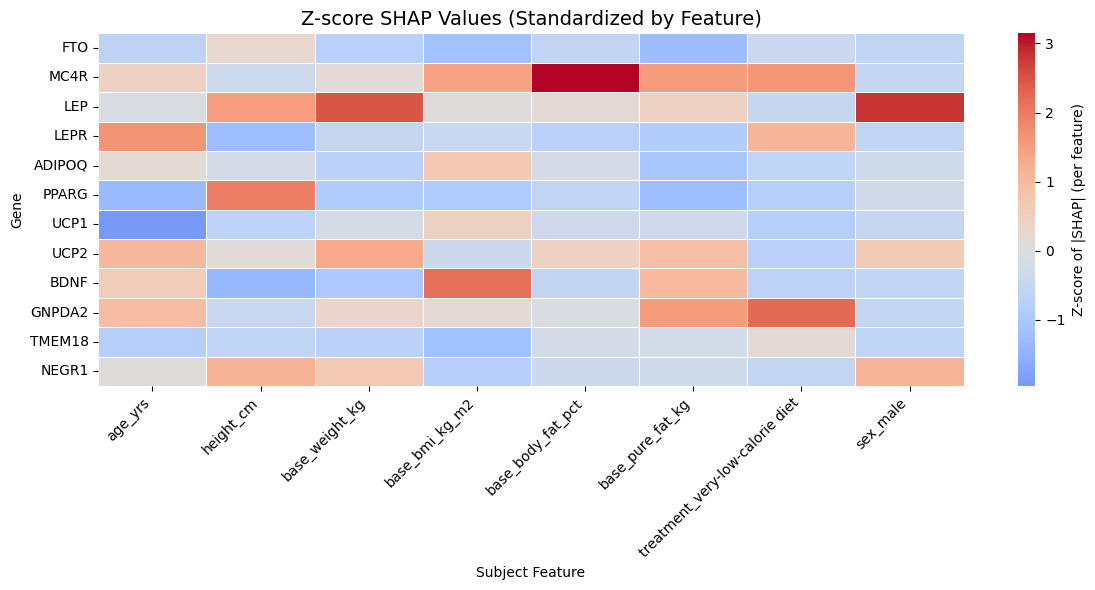

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(gene_shap_zscore_df_0, cmap='coolwarm', center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Z-score of |SHAP| (per feature)'})

# Í∞Å Feature ÏûÖÏû•ÏóêÏÑú, Ïñ¥Îñ§ Ïú†Ï†ÑÏûê(Gene) Í∞Ä Í∑∏ Feature ÏòàÏ∏°Ïóê Í∞ÄÏû• ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌñàÎäîÏßÄÎ•º Î≥¥Îäî Í≤É.
plt.title("Z-score SHAP Values (Standardized by Feature)", fontsize=14)
plt.xlabel("Subject Feature")
plt.ylabel("Gene")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [103]:
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG',
                 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']

Í∞ÅÍ∞ÅÏùò Ïú†Ï†ÑÏûê ÌÉÄÍπÉ Î™®Îç∏Ïù¥ Ïñ¥Îñ§ ÏûÖÎ†• FeatureÏóê ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïòÎäîÏßÄÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§å

üß¨ SHAP for: FTO


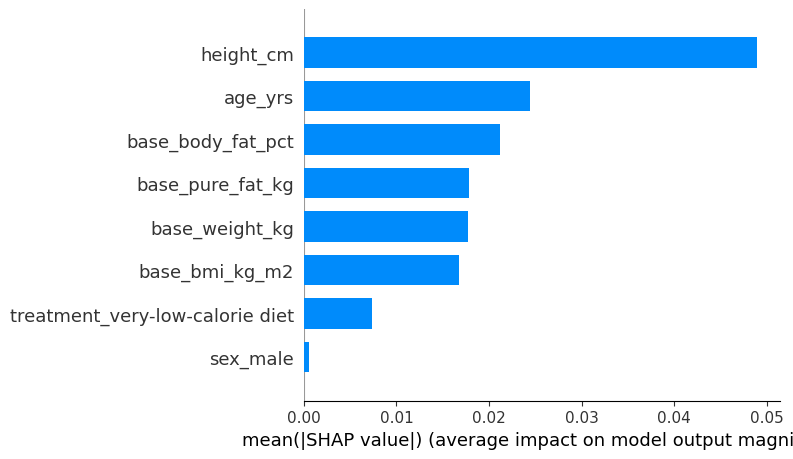

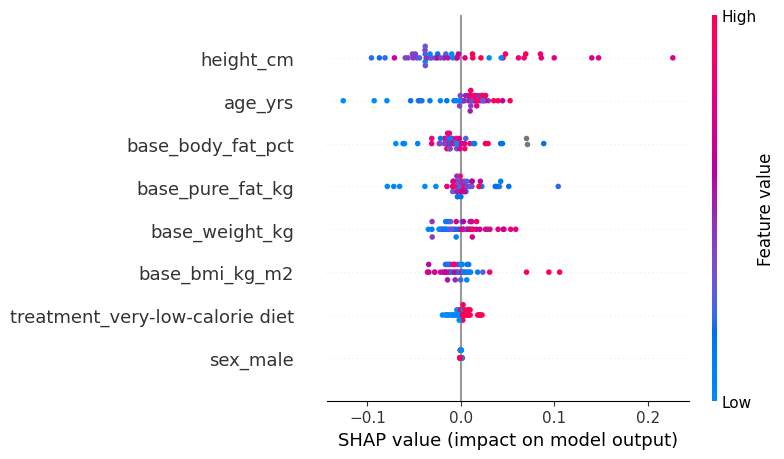

üß¨ SHAP for: MC4R


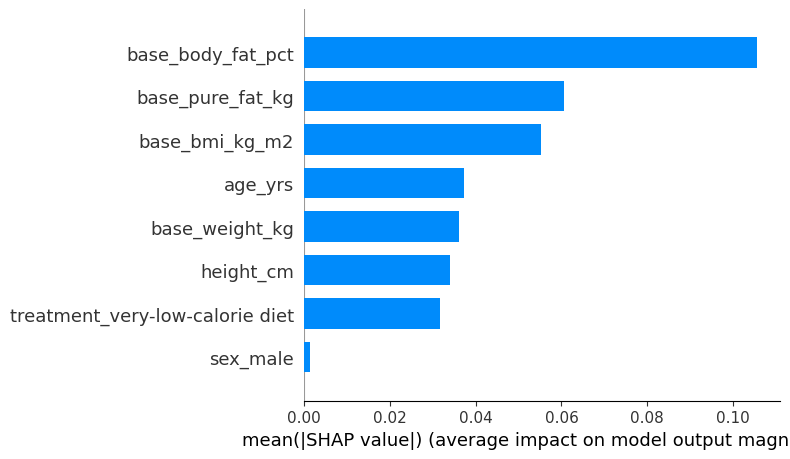

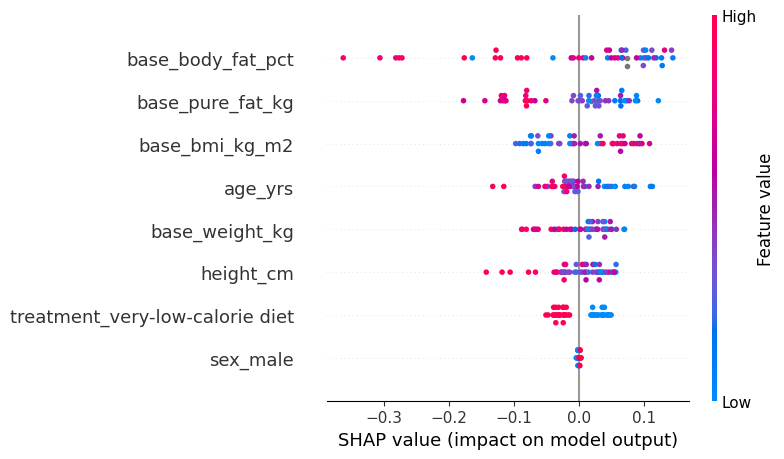

üß¨ SHAP for: LEP


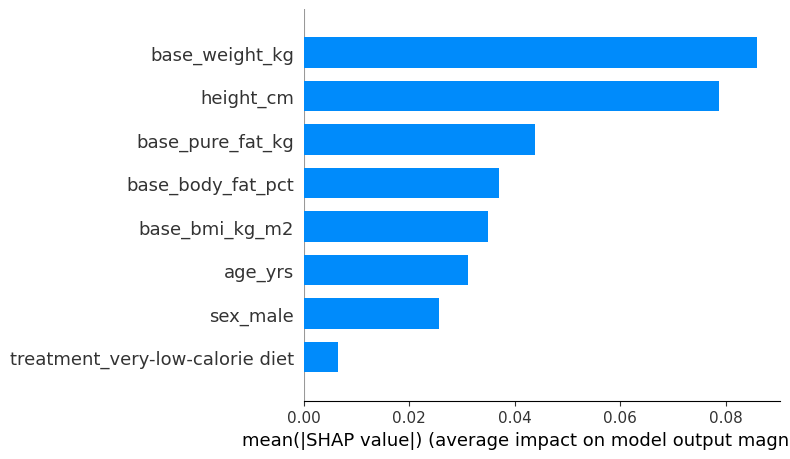

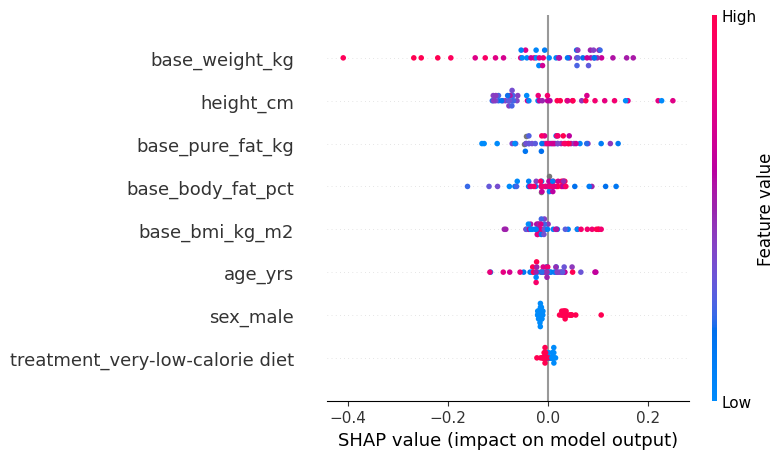

üß¨ SHAP for: LEPR


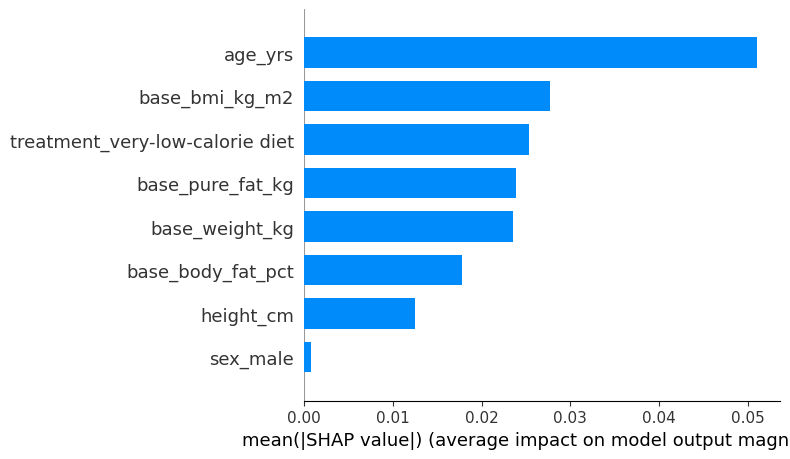

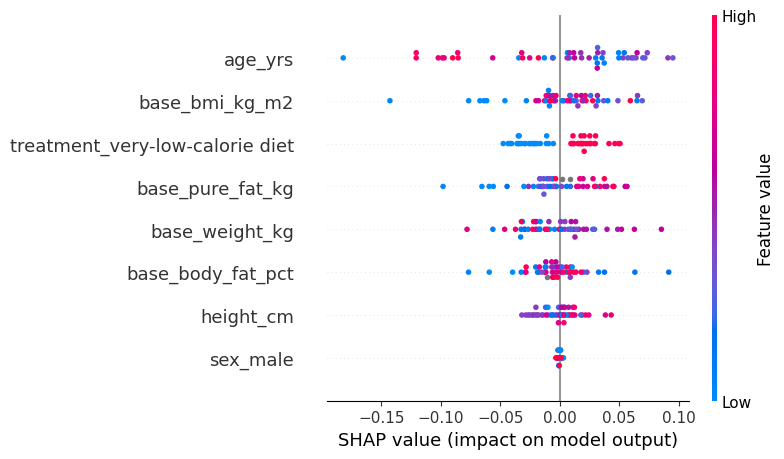

üß¨ SHAP for: ADIPOQ


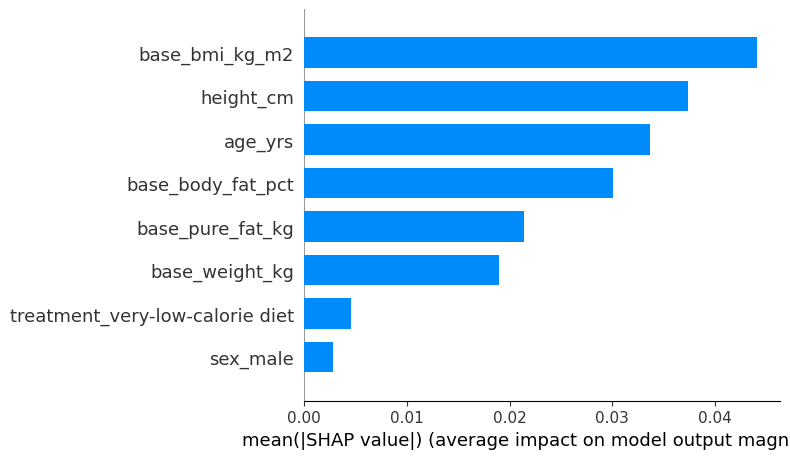

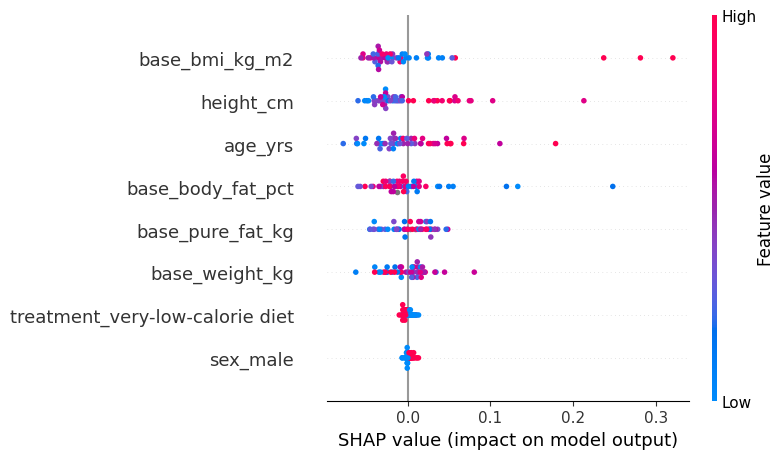

üß¨ SHAP for: PPARG


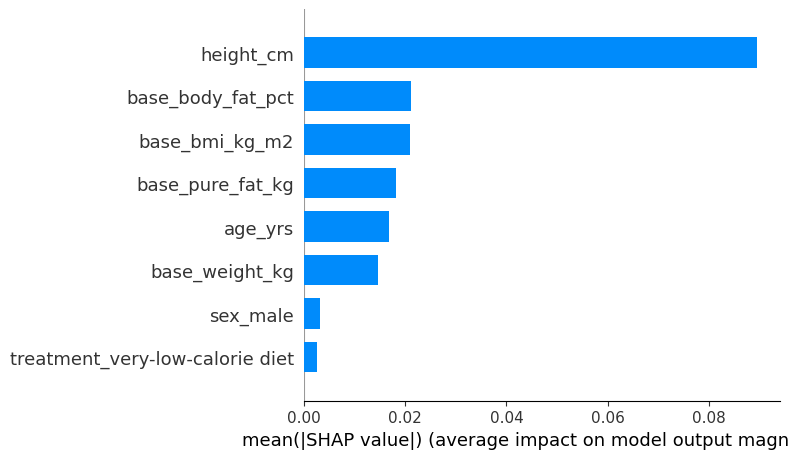

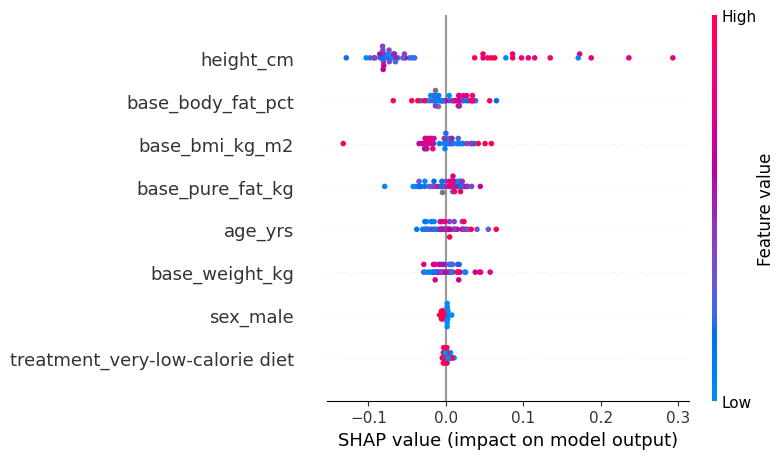

üß¨ SHAP for: UCP1


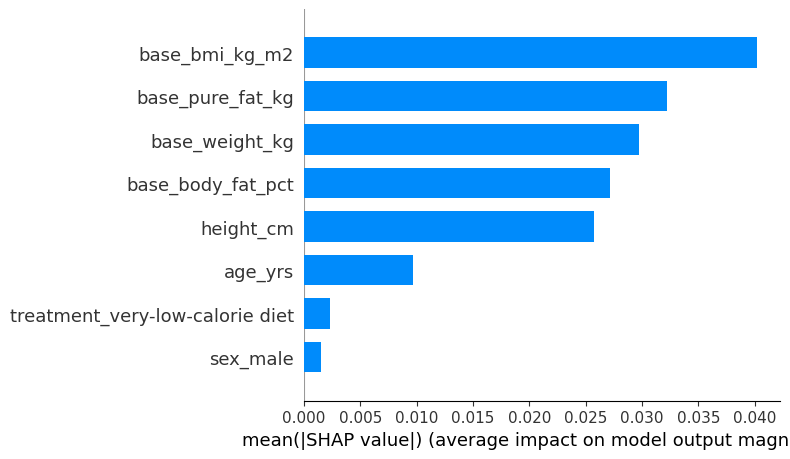

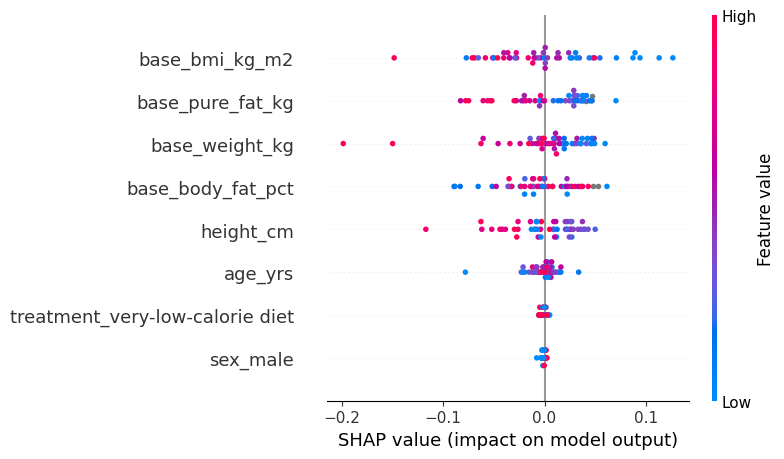

üß¨ SHAP for: UCP2


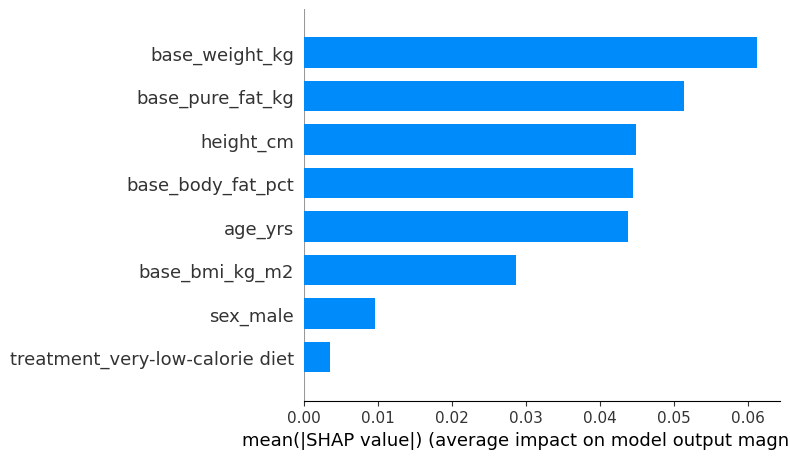

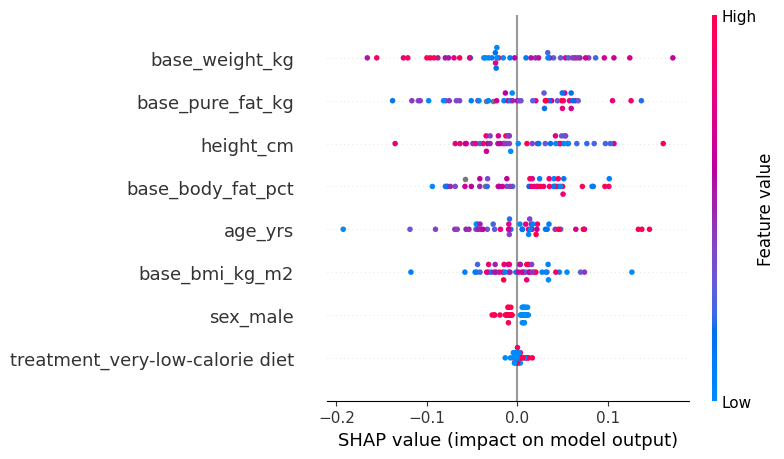

üß¨ SHAP for: BDNF


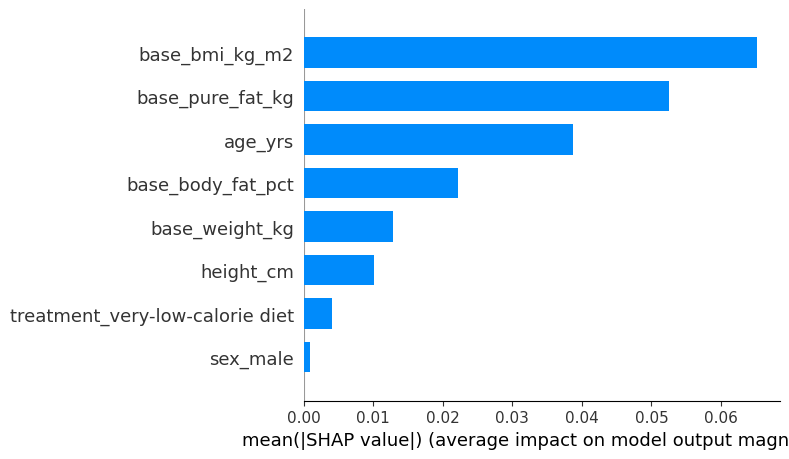

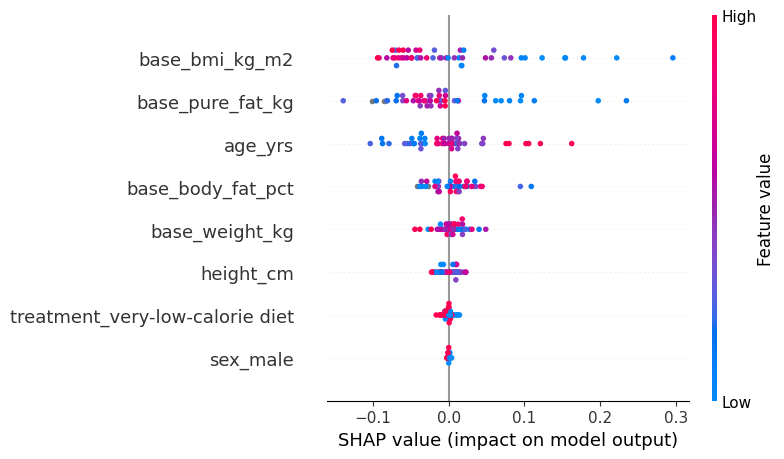

üß¨ SHAP for: GNPDA2


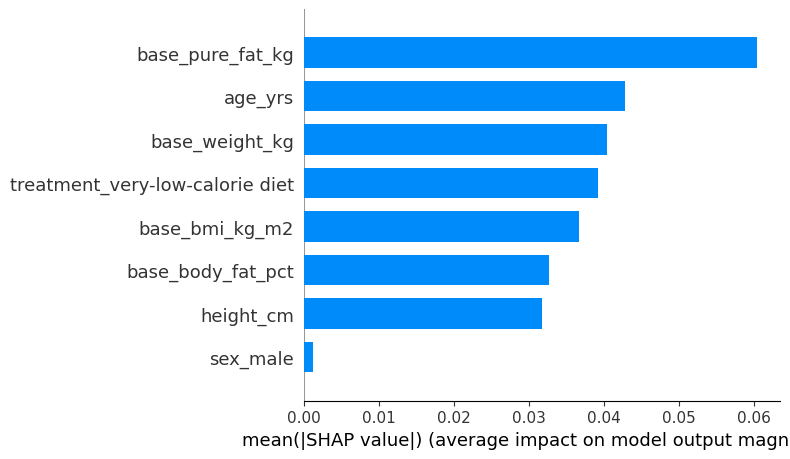

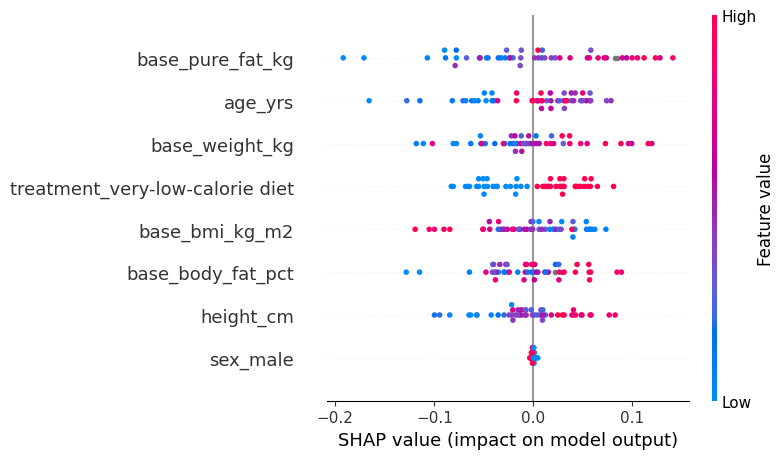

üß¨ SHAP for: TMEM18


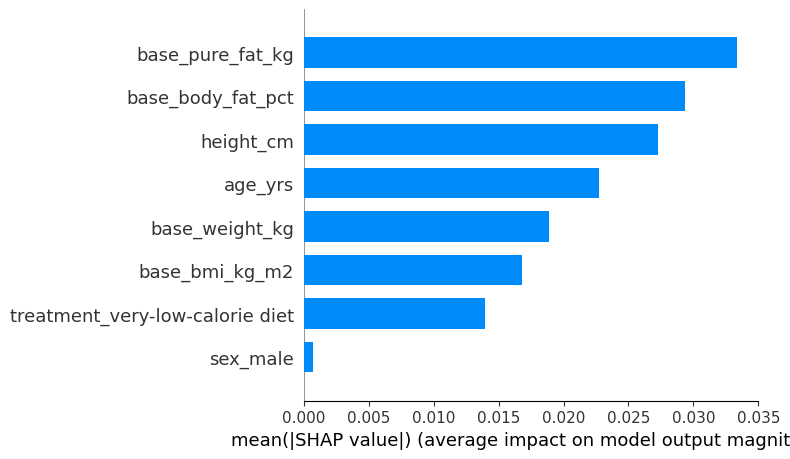

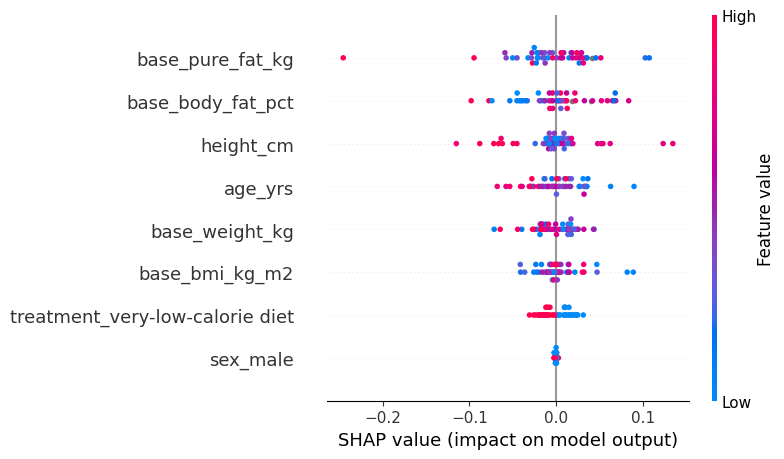

üß¨ SHAP for: NEGR1


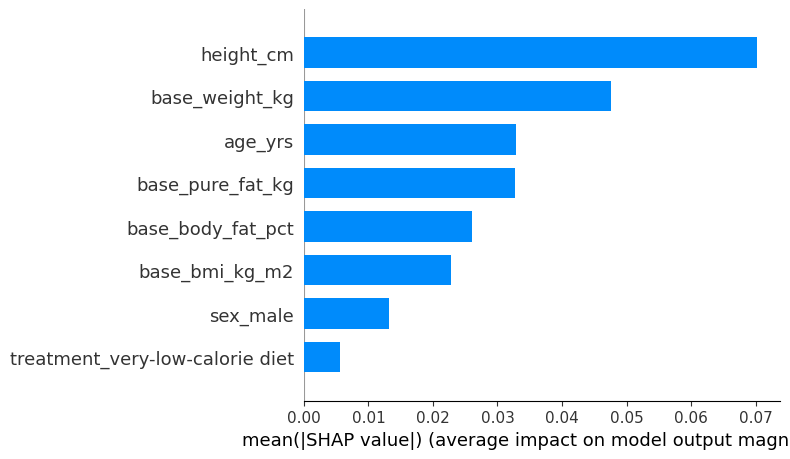

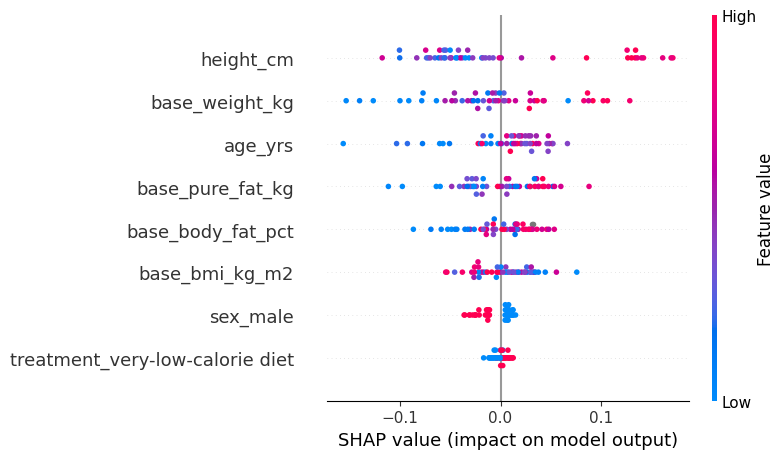

In [104]:
# Ïú†Ï†ÑÏûêÎ≥ÑÎ°ú SHAP ÏãúÍ∞ÅÌôî
for i, gene_name in enumerate(obesity_genes):  # Ïó¨Í∏∞ÏÑú Î∞îÎ°ú Ïú†Ï†ÑÏûê Ïù¥Î¶Ñ ÏÇ¨Ïö©!
    print(f"üß¨ SHAP for: {gene_name}")

    explainer = shap.TreeExplainer(model.estimators_[i])
    shap_values = explainer.shap_values(X_common)

    # summary plot with gene name as title
    shap.summary_plot(shap_values, X_common, plot_type="bar", show=True)
    shap.summary_plot(shap_values, X_common, show=True)

Í∞Å Ïú†Ï†ÑÏûê Î™®Îç∏Î≥ÑÎ°ú SHAPÍ∞íÏùò Ï†àÎåìÍ∞í ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨, feature importanceÎ•º 12Í∞ú Ïú†Ï†ÑÏûê Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ ÎπÑÍµê


Ïú†Ïö©ÏÑ±:
Ïú†Ï†ÑÏûêÎ≥ÑÎ°ú ÎØºÍ∞êÌïú featureÍ∞Ä Îã§Î•º Í≤ΩÏö∞, Ïù¥Î•º ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÌïòÍ±∞ÎÇò Í∑∏Î£πÌïëÌïòÏó¨ Ìï¥ÏÑùÏóê ÌôúÏö© Í∞ÄÎä•. ÎÖºÎ¨∏ FigureÎÇò Î∞úÌëúÏö© ÏãúÍ∞ÅÌôîÎ°úÎèÑ Îß§Ïö∞ Ï†ÅÌï©

In [105]:
shap_matrix = pd.DataFrame(
    [
        # Í∞Å Ïú†Ï†ÑÏûê(target Î≥ÄÏàò)Ïóê ÎåÄÌï¥ Í∞úÎ≥Ñ Î™®Îç∏ÏóêÏÑú SHAP Í∞í Í≥ÑÏÇ∞
        np.abs(
            shap.TreeExplainer(model.estimators_[i])  # iÎ≤àÏß∏ Ïú†Ï†ÑÏûêÏóê ÎåÄÌïú Î™®Îç∏Î°ú explainer ÏÉùÏÑ±
            .shap_values(X_common)                      # Ìï¥Îãπ Î™®Îç∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞ (Î™®Îì† sampleÏóê ÎåÄÌï¥)
        ).mean(axis=0)                                 # Í∞Å featureÏóê ÎåÄÌï¥ SHAP Í∞íÏùò ÌèâÍ∑†(Ï†àÎåìÍ∞í) Í≥ÑÏÇ∞
        for i in range(12)                             # Ï¥ù 12Í∞úÏùò ÎπÑÎßå Í¥ÄÎ†® Ïú†Ï†ÑÏûêÏóê ÎåÄÌï¥ Î∞òÎ≥µ
    ],
    columns=X_common.columns,   # Í∞Å Ïó¥ Ïù¥Î¶ÑÏùÄ X_commonÏùò feature Ïù¥Î¶ÑÎì§ (Ïòà: sex, age, height Îì±)
    index=obesity_genes        # Í∞Å Ìñâ Ïù¥Î¶ÑÏùÄ Ïú†Ï†ÑÏûê Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ (Ïòà: FTO, LEP, MC4R Îì±)
)

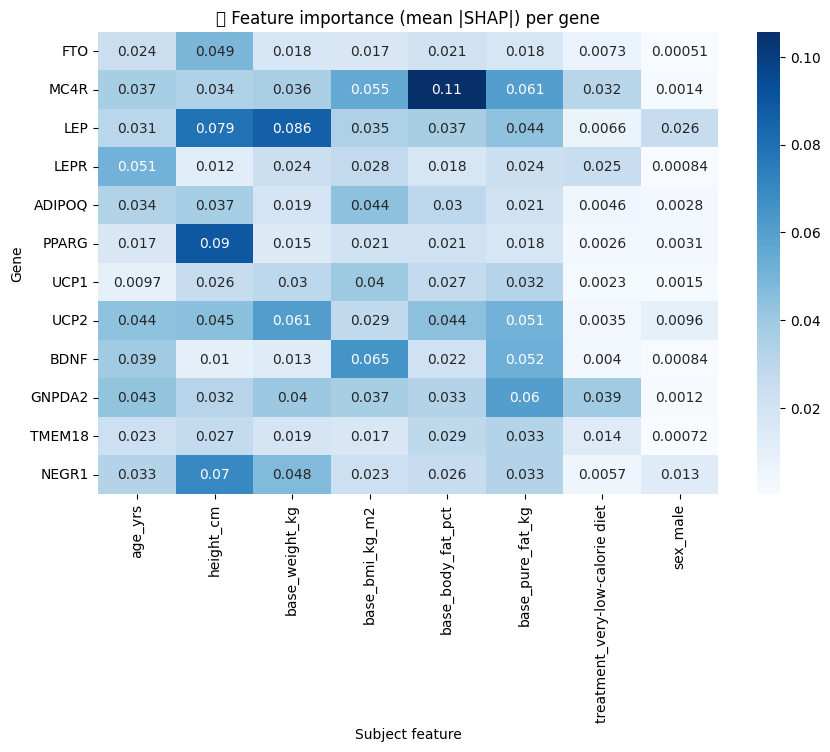

In [106]:
plt.figure(figsize=(10, 6))
sns.heatmap(shap_matrix, cmap="Blues", annot=True)
plt.title("Feature importance (mean |SHAP|) per gene")
plt.xlabel("Subject feature")
plt.ylabel("Gene")
plt.show()

### Î©îÌÉÄÏ†ïÎ≥¥ featureÏóê ÎåÄÌïú Ïú†Ï†ÑÏûêÎ≥Ñ SHAPÎ≤°ÌÑ∞ PCAÎ∂ÑÏÑù

In [107]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA (Ïú†Ï†ÑÏûê √ó feature ‚Üí 2D)
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_feature_shap_df)  # or zscore_df

# KMeans Clustering (Íµ∞Ïßë Í∞úÏàòÎäî Ï†ÅÏ†àÌûà ÌäúÎãù)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(gene_pca)

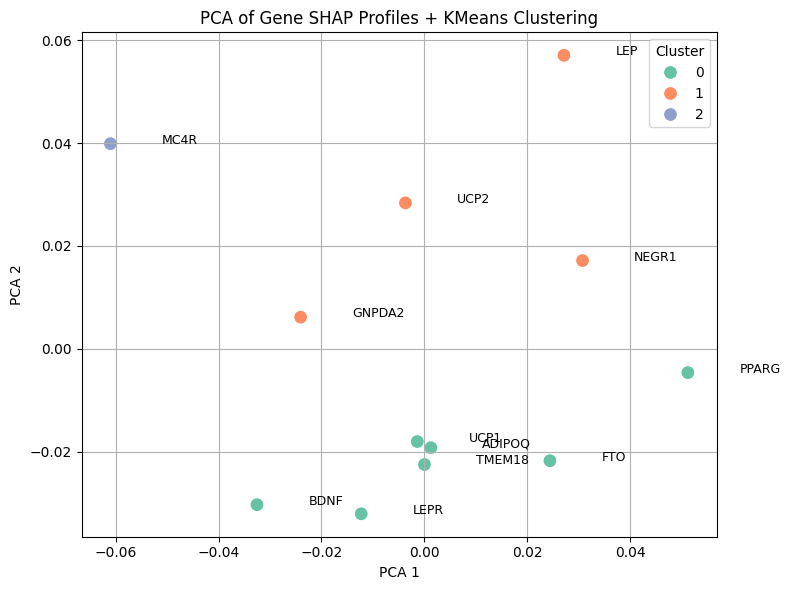

In [108]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gene_pca[:, 0], y=gene_pca[:, 1],
                hue=clusters, palette="Set2", s=100)

# Ïú†Ï†ÑÏûê Ïù¥Î¶Ñ ÎùºÎ≤®ÎßÅ
for i, gene in enumerate(gene_feature_shap_df.index):
    plt.text(gene_pca[i, 0] + 0.01, gene_pca[i, 1], gene, fontsize=9)

plt.title("PCA of Gene SHAP Profiles + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
# ÏñºÎßàÎÇò Ï†ïÎ≥¥Î•º Ïú†ÏßÄÌñàÎäîÏßÄ ÌôïÏù∏
print("Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™ÖÎ†•:", pca.explained_variance_ratio_)
print("ÎàÑÏ†Å ÏÑ§Î™ÖÎ†•:", pca.explained_variance_ratio_.sum())

Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™ÖÎ†•: [0.37599559 0.34711967]
ÎàÑÏ†Å ÏÑ§Î™ÖÎ†•: 0.7231152595816785


In [110]:
# Í∞Å Ï£ºÏÑ±Î∂Ñ(PCA_1, PCA_2)Ïù¥ Ïñ¥Îñ§ featureÎ°ú Íµ¨ÏÑ±ÎêêÎäîÏßÄ ÌôïÏù∏
pca_df = pd.DataFrame(pca.components_, columns=gene_feature_shap_df.columns, index=["PCA_1", "PCA_2"])

In [112]:
pca_df.shape

(2, 8)

In [111]:
pca_df

age_yrs  height_cm  base_weight_kg  base_bmi_kg_m2  base_body_fat_pct  \
PCA_1 -0.192161   0.633265        0.082601       -0.352813          -0.471925   
PCA_2  0.058816   0.469992        0.645294        0.035757           0.487338   

       base_pure_fat_kg  treatment_very-low-calorie diet  sex_male  
PCA_1         -0.363564                        -0.254822  0.104515  
PCA_2          0.284086                         0.054158  0.191909

In [114]:
# ÏòÅÌñ•Î†• ÌÅ∞ feature Î≥¥Í∏∞ ex> PCA_1Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ä featureÏàú
print(pca_df.T.sort_values("PCA_1", ascending=False).head())

                                    PCA_1     PCA_2
height_cm                        0.633265  0.469992
sex_male                         0.104515  0.191909
base_weight_kg                   0.082601  0.645294
age_yrs                         -0.192161  0.058816
treatment_very-low-calorie diet -0.254822  0.054158


In [116]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Î•º gene_feature_shap_dfÏóê Ï∂îÍ∞Ä
gene_clustered_df = gene_feature_shap_df.copy()
gene_clustered_df["cluster"] = clusters

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Îã®ÏúÑÎ°ú Í∑∏Î£πÌôî ÌõÑ ÌèâÍ∑† SHAP Í≥ÑÏÇ∞
cluster_feature_mean = gene_clustered_df.groupby("cluster").mean()

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ ÎåÄÌëú feature 3Í∞úÏî© Ï∂úÎ†•
for cluster_id, row in cluster_feature_mean.iterrows(): # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† SHAP Ìñâ Î∞òÎ≥µ
    top_features = row.sort_values(ascending=False).head(3) #ÏÉÅÏúÑ 3Í∞ú
    print(f"\nCluster {cluster_id}Ïùò ÎåÄÌëú SHAP feature:")
    for feat, val in top_features.items():  # ÎåÄÌëú featureÏôÄ Ìï¥Îãπ SHAP Í∞í Ï∂úÎ†•
        print(f"  - {feat}: {val:.4f}")


Cluster 0Ïùò ÎåÄÌëú SHAP feature:
  - height_cm: 0.0359
  - base_bmi_kg_m2: 0.0331
  - base_pure_fat_kg: 0.0285

Cluster 1Ïùò ÎåÄÌëú SHAP feature:
  - base_weight_kg: 0.0588
  - height_cm: 0.0564
  - base_pure_fat_kg: 0.0471

Cluster 2Ïùò ÎåÄÌëú SHAP feature:
  - base_body_fat_pct: 0.1056
  - base_pure_fat_kg: 0.0606
  - base_bmi_kg_m2: 0.0552


Ïù¥ÌõÑ Ïã§ÌóòÏóêÏÑú Ïã§Ï†úÎ°ú 12Í∞úÏùò ÎπÑÎßåÏú†Ï†ÑÏûêÏùò SHAPÍ∞Ä Í≤∞Í≥ºÏßÄÌëúÏóê ÌÅ∞ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏùÑ Î∞ùÌûò.

Îî∞ÎùºÏÑú ÏúÑ Ïã§ÌóòÏùÑ Îã§Ïãú ÏãúÌñâÌïúÎã§Î©¥, Ïú†Ï†ÑÏûê Î∞úÌòÑÎüâ- Í≤∞Í≥ºÏßÄÌëú Í∞ÑÏùò SHAPÏòÅÌñ•Î†•Ïù¥ ÌÅ∞ Ïú†Ï†ÑÏûêÏôÄ Î©îÌÉÄÏ†ïÎ≥¥Ïùò featureÏùò SHAPÍ∞íÏùÑ Î∂ÑÏÑùÌïòÏó¨ 'Ïú†Ï†ÑÏûê Î≥Ñ ÎØºÍ∞ê Î©îÌÉÄÏ†ïÎ≥¥ ÌäπÏÑ±' ÎòêÎäî 'Î©îÌÉÄÏ†ïÎ≥¥ featureÎ≥Ñ Ïú†Ï†ÑÏûê ÌäπÏÑ±'ÏùÑ Íµ¨ÌïúÎã§Î©¥ Îß§Ïö∞ Ïú†Ìö®Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏Í∞Ä Îê† Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌï®.
